In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("train.csv")

##### 1. How Many Rows and Columns are There in Data Set

In [3]:
df_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [9]:
users = set(np.array(df_train['msno']))

In [11]:
users

{'2/1jbu/R4XyiLVl67KEkP7jdB/NRUIfLAIMZwVce2VE=',
 'ajzwflaNEqEh76UNJvdnu8EkdG5JpsVc/MgSVk3+kSk=',
 'xRzdf511IeUXm4M2o7uoNshp/CCYlBcwnGv4Pj6xCrA=',
 'FvXAa7O3fJLCQFHXWlTyfepnjXmIMESc1Sc+jVfbDNc=',
 'klD+e25g4g2+R+KCTTJXXC5juCSb9IoWWCOhRvtWLJU=',
 'fXI1Ijsx/lfdW2fwcNd4SNngIO/7igkLyGU2ky3JdVM=',
 'vZoS8P2KAGCFhTpDV6vz/XYyRc2c7WH6RJ3lJRApqsU=',
 'uyU72AYqZGMUNKOY3M+ERKr3I9gD7Y+0qHxv6e04erY=',
 'hO/S4jHiHns44kDAqEQkgMZU7YF5oO61tgKZvZR2FSQ=',
 'odyIQQAwRLp/LkJ2OeEVkg6sPS+AaAKR9MwEOm2BNXA=',
 'ghWUsGcO2FxZhk+ZjwEOchNtjhNNPpQNDVe7R2HY3MA=',
 'fniGKeT0DKnZFIqud9UXbiadyC9YEdb0s+Q1hJuSSQU=',
 'JJ/Oxx0PJU6IMmFxEhsroXXPchGlsG+31eZ2srsCjgo=',
 '1VmPs8orrXUntqQFJyXdt9+OqR7Sz/5lnmLpkkJVfQA=',
 'Sj/pNM00tD1IEYGscRyP09e8jpkkWKsciQ5hGBtjnc8=',
 'WfaKVTQi9MlNu6XJZOlmdfnI9S1mY65KmUIOLrPxls8=',
 'WqROx3H42roxZXlnAeowwFhyo4wLFMNM4puk8c2n2ZE=',
 '4kySAIvHkJWlZ8iP/6Kx2xGQj4a0UefVoUwUK/EATVI=',
 'HYoH3OHUFEbAAz5lqzpw+yNDcV0CRUpKSn5y5vrgPYU=',
 'DhD7VbGwA1wCPnXKmdJZ7YlQXlmLH56ii/8ZrbT1jkE=',
 'BDBRao74gGvMYFq5AY

##### 2. Are All this Entries Unique

In [12]:
len(users)

992931

In [13]:
df_train.shape

(992931, 2)

In [15]:
del users

##### Answer - Yes

#### 3. How many Churn and Non Churn Users are there in My Dataset

In [14]:
df_train['is_churn'].value_counts()

0    929460
1     63471
Name: is_churn, dtype: int64

#### Answer -- > There are Roughly 9 Lakhs 29 Thousand Non Churn Users and 63 Thousand Churned Users

#### 4. What is The Percentage Of Imbalance

In [16]:
percent_of_non_churn = 929460/(929460+63471)
print("Percent of Non Churned Users are", percent_of_non_churn *100)
percent_of_churn = 63471/(929460+63471)
print("Percent of Churned Users are", percent_of_churn *100)


Percent of Non Churned Users are 93.60771292265021
Percent of Churned Users are 6.392287077349786


##### We can See that Dataset is Severly Imbalance Hence it is a Challenging Problem to Work On

### Let's Go On With Transactions.csv

In [2]:
#df_transactions = pd.read_csv("transactions.csv",chunksize=10000)
#df_transactions.head()

In [3]:
df_transactions.head()

AttributeError: 'TextFileReader' object has no attribute 'head'

In [13]:
del df_transcations 

In [4]:
import dask.dataframe as dd


In [5]:
df_transactions = dd.read_csv("transactions.csv" ,parse_dates = ['transaction_date', 'membership_expire_date'])

In [23]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


#### How Many User Activities are there in total ?


In [18]:
len(df_transactions)

21547746

#### Answer : We have Nearly 2 Crores and 15 Lakhs of User Activities Phew ! Thats Lot of Data

#### What are Unique Number of Users ?

In [20]:
len(df_transactions['msno'].unique()) 


2363626

#### There are Nearly 23 Lakhs of Unique User Activities , There Might Be Some New Users which are Not in df_train which are collected by writing scala script and Hence Some Users Might be Missed out this might be one reason

In [21]:
### Lets Do Some Aggreate analysis

In [22]:
df_transactions.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')

#### What are Number of Users who have actively cancelled theirs subscriptions ?


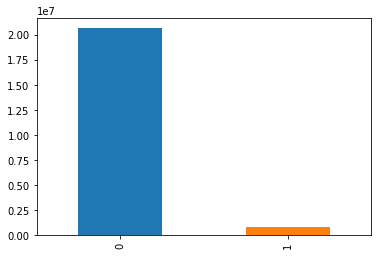

In [29]:
#https://stackoverflow.com/questions/46680494/dask-dataframe-count-values
df_transactions.is_cancel.value_counts().compute().plot(kind='bar')


In [30]:
# We need to have compute otherwise just a pandas series will be returned
df_transactions.is_cancel.value_counts().compute()

0    20690895
1      856851
Name: is_cancel, dtype: int64

#### Answer: There are 2 Crores 6 Lakhs People's Activities Who have not cancelled there susbcription and roughly 8 Lakh Users activities where susbcription was cancelled

#### How Many People Auto Renew Their Subscriptions ?

In [31]:
df_transactions.is_auto_renew.value_counts().compute()

1    18357950
0     3189796
Name: is_auto_renew, dtype: int64

#### Roughly 1 Crore 8 Lakh Users Auto Renew Their Subscription and Users Don't Auto Renew Their Subscription are 31 lakhs Roughly

#### Lets Plot Histograms , Pdf and Cdf of Some Statistics


In [45]:
df_transactions['plan_list_price'].to_dask_array()

AttributeError: 'Series' object has no attribute 'to_dask_array'

#### What is Maximum Plan List Price ?

In [61]:
df_transactions['plan_list_price'].max(axis=0).compute()

2000

#### What is Minimum Plan List Price ?

In [62]:
df_transactions['plan_list_price'].min(axis=0).compute()

0

In [69]:
import dask.array as da
h, bins = da.histogram(df_transactions['plan_list_price'], bins=50, range=[0, 2000])

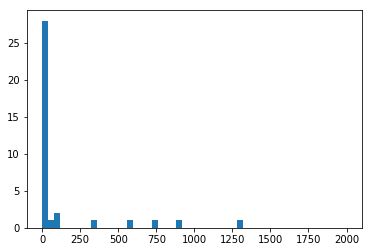

In [70]:
h.compute()
plt.hist(h, bins)
plt.show()

#### : Histogram of Plan List Price Obsvtn:
1. Very Large Obsverations within 0-150 window
2. There are very few obsvtn less than 5 at prices > 200 
3. This is kind of real if we see subscription services like Netflix and Hotstar they have very large number of affordable plans and very few Expensive Plans.

In [71]:
## Tommorows Agenda
## 1. Plot Histogram of Actual Amount Paid and Compare it with Plan List Price Observation Histograms
## 2. Plot Probabilty Distributions both for Amount Paid and Plan List Price
## 3. Play more with Transactions.csv try joining with train.csv and do some aggregate analysis
## 3. Play with user_logs.csv data using same dask Data Frame and play with that data
## 4. We will start with date field in both tables i.e. transactions.csv and user_logs.csv once we are done with simple plotting 
## and EDA

In [5]:
# I have also parsed Dates
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


#### What is Minimum Actual Amount Paid ?


In [6]:
df_transactions['actual_amount_paid'].min(axis = 0 ).compute()

0

#### What is Maximum Actual Amount Paid ?

In [7]:
df_transactions['actual_amount_paid'].max(axis = 0 ).compute()

2000

#### What is Mean Actual Amount Paid ?

In [8]:
df_transactions['actual_amount_paid'].mean(axis = 0).compute()

141.98732048354384

#### Histogram of The Actual Amount Paid 

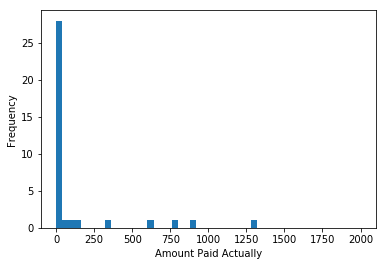

In [9]:
import dask.array as da
h, bins = da.histogram(df_transactions['actual_amount_paid'], bins=50, range=[0, 2000])
h.compute()
plt.hist(h, bins)
plt.xlabel("Amount Paid Actually")
plt.ylabel("Frequency")
plt.show()

#### Probability Distribution Functions for Actual Price Paid

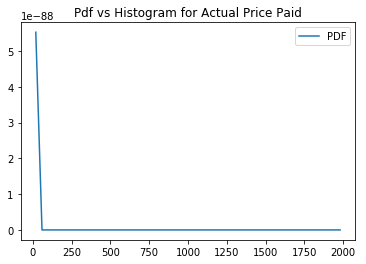

In [13]:
# Reference : https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html
from scipy import stats
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
#plt.plot(bin_centers, h, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.title("Pdf vs Histogram for Actual Price Paid")
plt.show()


In [14]:
## Lets Play Around more with dataset to get comfortable with dask Data Frames and Pandas itself lets ask Few simple Data Analysis 
## Questions

### Mean actual price paid by as per is_cancel

In [17]:
df_transactions.groupby("is_cancel").actual_amount_paid.mean().compute()

is_cancel
0    143.608803
1    102.832399
Name: actual_amount_paid, dtype: float64

### Obsvtns:
1. People who actively cancels their subscriptions tends to pay lesser amount as compared to those who don't actively cancel their subscription

### Lets Check Same for AutoRenew

In [18]:
df_transactions.groupby("is_auto_renew").actual_amount_paid.mean().compute()

is_auto_renew
0    212.821429
1    129.679500
Name: actual_amount_paid, dtype: float64

1. People who don't auto-renew their subscription are paying infact more.
2. Also difference is significantly more nearly 42 dollars between mean.
3. One Possibe reason can be that auto renewers have small amount paid and are more in numbers as compared to non auto renew person

### Joins and Aggregating Data

In [19]:
## Before we move on to joining data lets clear one thing
df_transactions[df_transactions['msno']=='YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc='].head()

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\core.py:4206: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
753139,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-10-31,2015-12-01,0


In [21]:
df_transactions[df_transactions['msno']=='M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI='].head()

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\core.py:4206: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
729129,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,35,7,0,0,0,2016-08-29,2016-09-03,0


In [22]:
## there can be multiple entries even for single user
## This can create problem while joining as it is possible that multiple entries will be there 
## For single user in the joined table only with different transaction_date
## ex (user1 , date:xyz), (user2 , date:abc)

In [36]:
result = df_transactions[df_transactions['msno']=='M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI='].head()
#result.sort_values(['transaction_date'])

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\core.py:4206: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


In [35]:
result.max('transaction_date')

ValueError: No axis named transaction_date for object type <class 'pandas.core.frame.DataFrame'>

In [38]:
min(result['transaction_date'])

Timestamp('2015-09-30 00:00:00')

In [40]:
result.sort_values(['msno','transaction_date']).drop_duplicates('transaction_date', keep='last')


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
729129,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,35,7,0,0,0,2016-08-29,2016-09-03,0


In [41]:
result[result.groupby('msno')['transaction_date'].transform('max') == result['transaction_date']]


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
729129,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,35,7,0,0,0,2016-08-29,2016-09-03,0


In [43]:
result.loc[result.groupby('msno').transaction_date.idxmax()]


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
729129,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,35,7,0,0,0,2016-08-29,2016-09-03,0


In [45]:
df_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [46]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


In [47]:
## Idea for Joining 
## Msno is common in both tables and it can be used for joining
## However there will be lot of duplicates if we do
## Idea
## Create a new data frame where customers are grouped by msno 
## Now only select the max membership expire date of the customers 
## This will ensure to drop duplicates 
## Finally join the data

In [57]:
## Before we move on to joining data lets clear one thing
df_transactions[df_transactions['msno']=='YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc='].head()

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\core.py:4206: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
753139,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-10-31,2015-12-01,0


In [62]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


In [17]:
users = list(df_train['msno'])

In [18]:
users

['waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=',
 'QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=',
 'fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=',
 'mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=',
 'XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=',
 'GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=',
 'lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=',
 'T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=',
 'Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=',
 'MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=',
 'I8dFN2EjFN1mt4Xel8WQX1/g7u6Dg4PBMHLkiDjhUS8=',
 '0Ip2rzeoa44alqEw3daokOIJ5pRlKsuvSXpFiVfz6/U=',
 'piVhWxrWDmiNQFY6x+geStHfdT+nyD9lgXq05MSi7So=',
 'wEUOkYvyz3xTOx2p9z2Xcs4OzYsH/ZrNFUKZ+KFPf0M=',
 'xt4EjWRyXBMgEgKBJy63klKN6wIIR31t1K771V2Glps=',
 'QS3ob4zLlWcWzBIlbsd6lQIA3nJusPs6rNDVSEpQO2k=',
 '9iW/UpqRoviya9CQh64RoYLPjiws8+biwscN+g5qYm4=',
 'd7QVMhAzjj4yc1Ojjbf2SFJam90RaUcwNDe3NxHVluA=',
 'uV7rJjHPrpNssDMmY2OnfJnib8BUqeyvUxrIQnbRwek=',
 'TZxhkfZ9NwxqnUrNsMgMDj4SZi+p0Zv/oK9UsH5uqnc=',
 '+THH2QTeGyADYlZvoa

In [21]:
for user in users:
    df_transactions[df_transactions['msno'] == user]

KeyboardInterrupt: 

In [30]:
temp_df = df_transactions[df_transactions.groupby('msno').membership_expire_date  == df_transactions.groupby('msno').membership_expire_date.max().compute()]

NotImplementedError: msno
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=    False
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=    False
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=    False
++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=    False
++/imsKMXignukHBIRfOhocobbR8Qk1Ew5mhjOCJg5A=    False
++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=    False
++1GCIyXZO7834NjDKmcK1lBVLQi9PsN6sOC7wfW+8g=    False
++2Ju1OdxLSyexwhZ/C0glNK0DMIfUjsFpk9lt8Dll8=    False
++2m3qvMRunJP9QTvQC5ex57i0qYG2HoTj6ZC8it+R0=    False
++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=    False
++3fWHRDC5GWWlovHcrOKWNwZYOjWWkJyeLlL65uv78=    False
++3wqX72HmowxFh5MrHvNi5Ce8D3ldo4zaUL932TYbs=    False
++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=    False
++4cUL0b9CfW8cj0A/wfSxQc4k4fcVtWcLqk2UOdpKs=    False
++5XBxbJNz3idK9egVoGbWJ4xhGQu2MR0pSP0kL9DK4=    False
++5nB0VuUuyj9xlngqv3OKUrmQXWZkO5QtB9FYXWTok=    False
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=    False
++6P09mCSJSh+Ft2pvZ0FWTrtcI3v1A7h3/coh8dBKw=    False
++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=    False
++9JUsaZioofS6Fb20Z0z2QOlWNzakO0PRF5GZ75yi4=    False
++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=    False
++BW1PJYU5OZi3n3+IDLiU+d1IL1VE/GLx6p64TDs6U=    False
++CSmvB4ldSO0TeDSMWy9vH0M1oQJN0XXyM7sYLkoTc=    False
++CzVs35NSfU/gjDrGbWLVMweubEiMZsuvd3eTbXs58=    False
++D+fngRaZW1kQC5bvDwcovLYEp6Rn9LY1lxslM0TqM=    False
++DTuDIewp2QLkg7NpQqWsqHCcTU58nTX5gPptZ3fb8=    False
++DcyRE+ZfLtlKGigvv9dv5EQ4KAhHhiN9LM9X+F1vw=    False
++EX7OEtJz+hvd7VXRkcZINs+guDwpHq7ahe/o99E1o=    False
++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=    False
++F3VMEkKIsgB8UiFLlyVvw6uHd2cilm6HvAF5XHtrk=    False
                                                ...  
v0SkXbmRe1L+vo4PyUz5IX6WiLzeKw3D99BzAzGmL0g=    False
v3etVEQ5ujzvjvg/sdXHHmGIUqDHmEGO71vNqoMzuOo=    False
v9XX8VWcP726dSKpPlZW8uaeLPdRxnAw7rsR/IezrUg=    False
vbhN2Ugp4gduNeG86mX/n3j7aHh0wFj76ppp6IOUWjQ=    False
vsMEQ6p6QTrfWo6EtG8B8FwA8BpPT59d5SY6vxaVozw=    False
vuAfI1Euec3e7IkDF5O5D81cDoM06JNoTxGSRAIe4qI=    False
wLOkTJuXs1flqHxw+PQhssX5yC9kWo4RUAS8PiQlKKk=    False
wS0EhStSowecV8rDh0PHGPHdp02Z/GKQVZCd9zbgZx4=    False
wU8KZolOobzM+ADB3kVTljVaUSyeFp5QP4YwOBaVO3M=    False
wW41LTA4ol2EX7Lnx9bonrQ25gSzVLg5xjZno0fBq2M=    False
wWGnolhSO5hMsgyOCli7K15k1jXWiYFU43UD6BT4pxI=    False
wXxkb//hCgkMxXVMeWoDZ8nRLT2xZl6tqE6LnQ3NVEQ=    False
xBkdGjijCQ0UprwWd51HeFzpb0OPao0Oo2Fix3Okewo=    False
xM7xHmoWksgBcv2w31EJkW/3h30WGhIKiJEzqEoFdTA=    False
xsRm1Wm3oSO8xUG4UdeLxFUqFFmInUJs/0e7ioCVoDc=    False
xv4MMEx0zXUjDTOGt9TEFC+xdinldsSmFlmTSH68H48=    False
y+qK+/hjB//l6o7hMdCbxao5AF+ZgiCfTW64qf/VPIw=    False
y02sZI6+eGrWQH5eNqE8ELnBfZtiTUy3gaMWX9xU0sU=    False
y0DxXy8dxjxk32WbhxWG1q6GltrYeW5UD38U5GMKnRg=    False
y5Kp6nKTrNCfPW/05jfwKc76Mgj80lm/QFZGnd3/35c=    False
y68A5jWwbrTAMNll4sJU1IIeCYrEASyttULaJMND+FM=    False
y9HaKo5xdv1j1TzFNiCjJg+/mKl1oWrR5tZxUzm75Fs=    False
yRYA61qz+gTAfcuBSYHO08KvsE52TEueIYRR5HmZjpk=    False
yWf7qrixqoa0WE3OqSsBMquzFeReAgP4VNYg6ZiAEEw=    False
yg6um5+H6/Xujjmi4ywL2Ej15VZTKDwnzR0jZmDyPR8=    False
yolpfH801RqTRb3cHHZEUkNG7yL2K/4FmFZXgmxt5dA=    False
yqsN0kjbYLiBqKZNxhuAtorxfmTqcE8cxed4QlX+VKQ=    False
z8RpTmOi/Av+NvOGN68YFS4inoyK3NJcASwVCporK4w=    False
zXvv3eRjqkytTGtA99Yp1FDx9aVkvvFoHvr3qNHyoUw=    False
zYsW+XUsI+BchX04eMsRWuLbLfDaG7YYPLn61x7P+xg=    False
Name: membership_expire_date, Length: 2363626, dtype: bool

In [ ]:
temp_df = df